<a href="https://colab.research.google.com/github/sabil62/Machine-Learning-sets/blob/master/AI_Project_Cubesat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

Here matplotlib and keras.model is also not required for final version. They are here fot the demo.

In [22]:
import numpy
import os
import cv2
import numpy as np


from keras.models import model_from_json
import matplotlib.pyplot as plt

# **Loading Model**

In [23]:
# load json and create model
json_file = open('/content/drive/MyDrive/AI/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/AI/model.h5")
print("Loaded model from disk")

loaded_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Loaded model from disk


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4

# **Using The Model**

The Image is Good Image
The accuracy of the image is  95.85471153259277 %


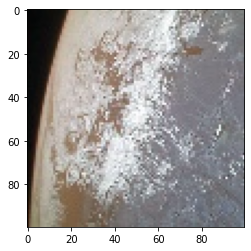

In [26]:
test_image_i = cv2.imread('/content/drive/MyDrive/AI/g4.jpg')
test_image = cv2.imread('/content/drive/MyDrive/AI/g4.jpg',cv2.IMREAD_GRAYSCALE)
X = np.array(test_image).reshape(-1, 100, 100, 1)
test_image = X/255
my_predicted_image = loaded_model.predict(test_image)
plt.imshow(test_image_i)

if my_predicted_image[0,0] > my_predicted_image[0,1]:
    print("There is Bad Image")
    print("The accuracy of the image is ",my_predicted_image[0,0]*100,"%" )
    # delete the image
else:
    print("The Image is Good Image")
    print("The accuracy of the image is ",my_predicted_image[0,1]*100,"%" )
    #send to Ground station



# **Testing the model Accuracy**

In [27]:
labels = ['bad', 'good']
img_size = 100
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [29]:
test = get_training_data('/content/drive/MyDrive/AI/test_dataset_v5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [30]:
X_t = []
y_t = []


for feature, label in test:
    X_t.append(feature)
    y_t.append(label)
    
test_x = np.array(X_t).reshape(-1, 100, 100, 1)
test_y = np.array(y_t)

In [31]:
test_x = test_x/255

In [32]:
test_loss, test_acc = loaded_model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 473ms/step - loss: 0.4602 - accuracy: 0.8667


In [33]:
print('\nTest accuracy: {}'.format(test_acc))


Test accuracy: 0.8666666746139526
